In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix , classification_report
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.model_selection import train_test_split , StratifiedKFold , RandomizedSearchCV
from tensorflow.keras.layers import Dense , InputLayer , Dropout , Conv2D , MaxPooling2D , Flatten , BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import linear, relu, sigmoid
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model , save_model
import cv2

In [4]:
from google.colab import drive
drive.mount('/content/drive')
features_train = pd.read_csv('/content/drive/My Drive/csvTrainImages 13440x1024.csv')
target_train = pd.read_csv("/content/drive/My Drive/csvTrainLabel 13440x1.csv")
features_test = pd.read_csv("/content/drive/My Drive/csvTestImages 3360x1024.csv")
target_test = pd.read_csv("/content/drive/My Drive/csvTestLabel 3360x1.csv")

Mounted at /content/drive


# Exploring Data & Preprocessing

In [ ]:
features_train.sample(10)

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.896,0.897,0.898,0.899,0.900,0.901,0.902,0.903,0.904,0.905
235,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6468,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1174,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,4,226,182,0,0,0
8321,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10018,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13359,0,0,0,0,0,0,0,0,0,0,...,0,16,240,88,0,0,0,0,0,0
11427,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1057,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
num_classes_train = target_train.nunique()
print(f"Number of classes: {num_classes_train}")

Number of classes: 1    28
dtype: int64


In [ ]:
num_classes_test = target_test.nunique()
print(f"Number of classes: {num_classes_test}")

Number of classes: 1    28
dtype: int64


In [ ]:
arabic_chars = ['alef','beh','teh','theh','jeem','hah','khah','dal','thal','reh','zain','seen','sheen','sad','dad','tah','zah','ain','ghain','feh','qaf','kaf','lam','meem','noon','heh','waw','yeh']

In [ ]:
features_train = features_train / 255.0
features_test =  features_test / 255.0

In [ ]:
features_train.sample(10)

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.896,0.897,0.898,0.899,0.900,0.901,0.902,0.903,0.904,0.905
9497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.027451,0.133333,0.0,0.0,0.0,0.0,0.0
795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
10563,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
12906,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
9143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
7762,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.482353,0.576471,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
5332,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
7214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [ ]:
x_train = features_train.to_numpy()
y_train = target_train.to_numpy()-1
x_test = features_test.to_numpy()
y_test = target_test.to_numpy()-1
print(f"X_Train Shape : {x_train.shape}")
print(f"X_Test  Shape : {x_test.shape}")
print(f"Y_Train Shape : {y_train.shape}")
print(f"Y_Test  Shape : {y_test.shape}")

X_Train Shape : (13439, 1024)
X_Test  Shape : (3359, 1024)
Y_Train Shape : (13439, 1)
Y_Test  Shape : (3359, 1)


Class Distribution in Training Set:
Class 0: 479 instances
Class 1: 480 instances
Class 2: 480 instances
Class 3: 480 instances
Class 4: 480 instances
Class 5: 480 instances
Class 6: 480 instances
Class 7: 480 instances
Class 8: 480 instances
Class 9: 480 instances
Class 10: 480 instances
Class 11: 480 instances
Class 12: 480 instances
Class 13: 480 instances
Class 14: 480 instances
Class 15: 480 instances
Class 16: 480 instances
Class 17: 480 instances
Class 18: 480 instances
Class 19: 480 instances
Class 20: 480 instances
Class 21: 480 instances
Class 22: 480 instances
Class 23: 480 instances
Class 24: 480 instances
Class 25: 480 instances
Class 26: 480 instances
Class 27: 480 instances


<ipython-input-5-7d10874b7f8f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(class_distribution.keys()), y=list(class_distribution.values()), palette="Reds_d")


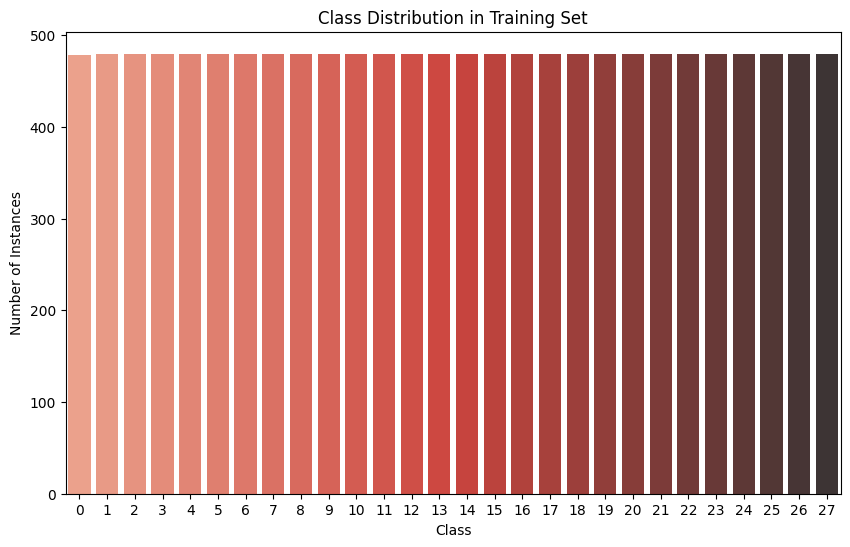

In [ ]:
unique, counts = np.unique(y_train, return_counts=True)
class_distribution = dict(zip(unique, counts))

print("Class Distribution in Training Set:")
for cls, count in class_distribution.items():
    print(f"Class {cls}: {count} instances")

plt.figure(figsize=(10, 6))
sns.barplot(x=list(class_distribution.keys()), y=list(class_distribution.values()), palette="Reds_d")
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.title('Class Distribution in Training Set')
plt.show()

In [ ]:
x_train = x_train.reshape(-1,32,32,1)
x_test  = x_test.reshape(-1,32,32,1)

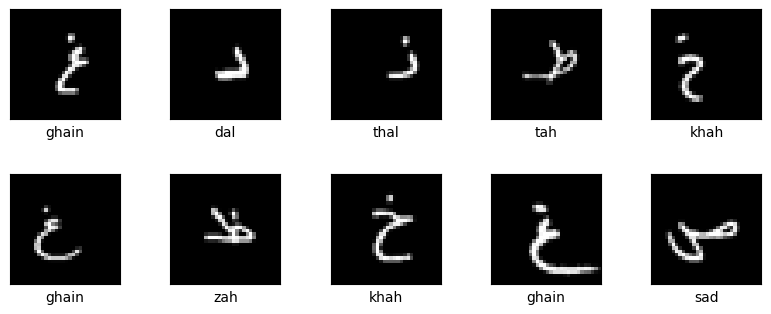

In [ ]:
ra = np.random.randint(0, 13440, size=25)
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[ra[i]].reshape(32, 32).T, "gray")
    plt.xlabel(arabic_chars[int(y_train[ra[i]][0])], fontsize=10, color='black', ha='center')
    plt.subplots_adjust(hspace=0.5)
plt.show()

In [ ]:
y_train = to_categorical(y_train)
y_test  = to_categorical(y_test)
print(y_train.shape, y_test.shape)

(13439, 28) (3359, 28)


#Modeling using CNN

In [2]:
model = Sequential()
model.add(Conv2D(32 , (5,5) , padding='same' , activation='relu' , input_shape=(32,32,1)))
model.add(Conv2D(32 , (5,5) ,activation='relu'))
model.add(Conv2D(32 , (5,5) , activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64 , (5,5) ,padding='same', activation='relu'))
model.add(Conv2D(64, (5, 5), activation="relu"))
model.add(Conv2D(64, (5, 5), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(28, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

NameError: name 'Sequential' is not defined

### Applying Augmentation

In [ ]:
gen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False

)
train_gen = gen.flow(x_train, y_train, batch_size=64)
test_gen  = gen.flow(x_test , y_test , batch_size=64)

In [ ]:
model_checkpoint_callback = ModelCheckpoint(
    filepath="best.keras",
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    mode='max'
)

In [ ]:
history = model.fit(
    train_gen,
    epochs=50,
    verbose=1,
    validation_data = test_gen,
    callbacks=[model_checkpoint_callback]
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


208/210 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.1776 - loss: 2.7117
Epoch 1: val_accuracy improved from -inf to 0.29711, saving model to best.keras
210/210 ━━━━━━━━━━━━━━━━━━━━ 18s 57ms/step - accuracy: 0.1794 - loss: 2.7035 - val_accuracy: 0.2971 - val_loss: 2.2038
Epoch 2/50
207/210 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6068 - loss: 1.1129
Epoch 2: val_accuracy improved from 0.29711 to 0.74189, saving model to best.keras
210/210 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.6080 - loss: 1.1099 - val_accuracy: 0.7419 - val_loss: 0.7976
Epoch 3/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7718 - loss: 0.6830
Epoch 3: val_accuracy improved from 0.74189 to 0.83537, saving model to best.keras
210/210 ━━━━━━━━━━━━━━━━━━━━ 12s 41ms/step - accuracy: 0.7719 - loss: 0.6827 - val_accuracy: 0.8354 - val_loss: 0.5003
Epoch 4/50
208/210 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8538 - loss: 0.4660
Epoch 4: val_accuracy improved from 0.83537 to 0.86544, savin

In [ ]:
model.evaluate(train_gen)

210/210 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.9805 - loss: 0.0713


[0.0651804730296135, 0.9803556799888611]

In [ ]:
model.evaluate(test_gen)

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9634 - loss: 0.1701


[0.17030225694179535, 0.960107147693634]

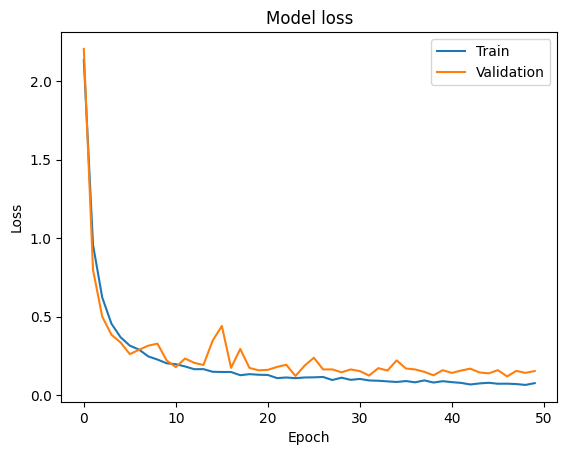

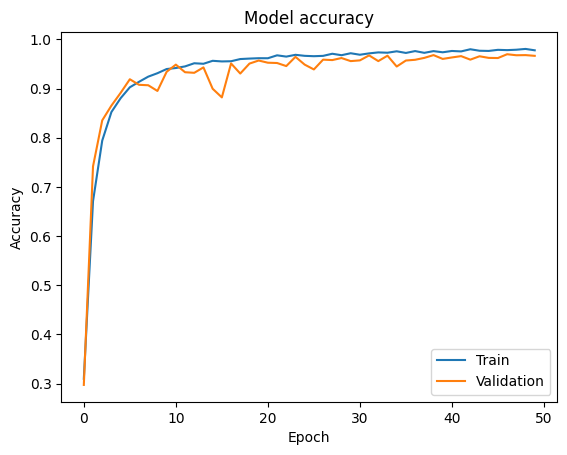

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [ ]:
x_test_reshaped = x_test.reshape(-1, 32, 32, 1)

pred = model.predict(x_test_reshaped)

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


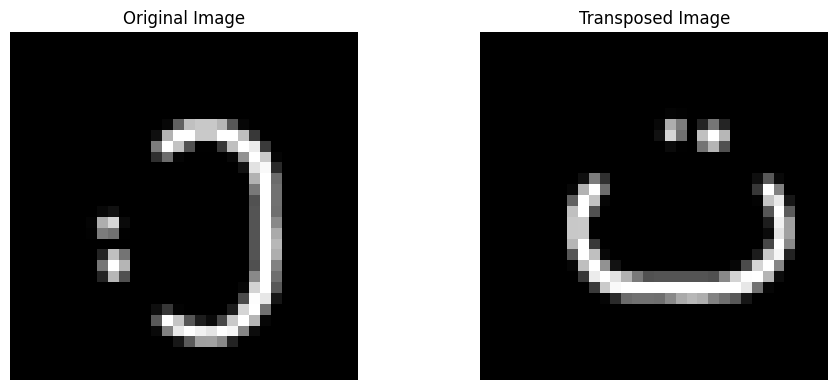

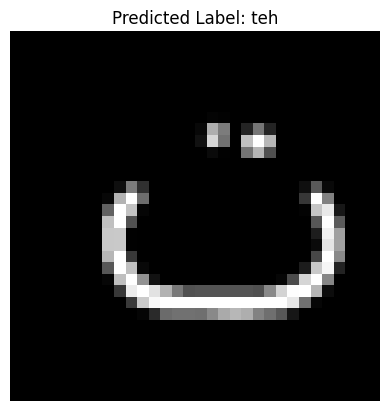

In [ ]:
predicted_label = arabic_chars[np.argmax(pred[4])]

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(x_test[4].reshape(32, 32), cmap='gray')
plt.axis('off')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(x_test[4].reshape(32, 32).T, cmap='gray')
plt.axis('off')
plt.title('Transposed Image')

plt.tight_layout()
plt.show()

plt.imshow(x_test[4].reshape(32, 32).T, cmap='gray')
plt.title(f'Predicted Label: {predicted_label}')
plt.axis('off')
plt.show()

105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


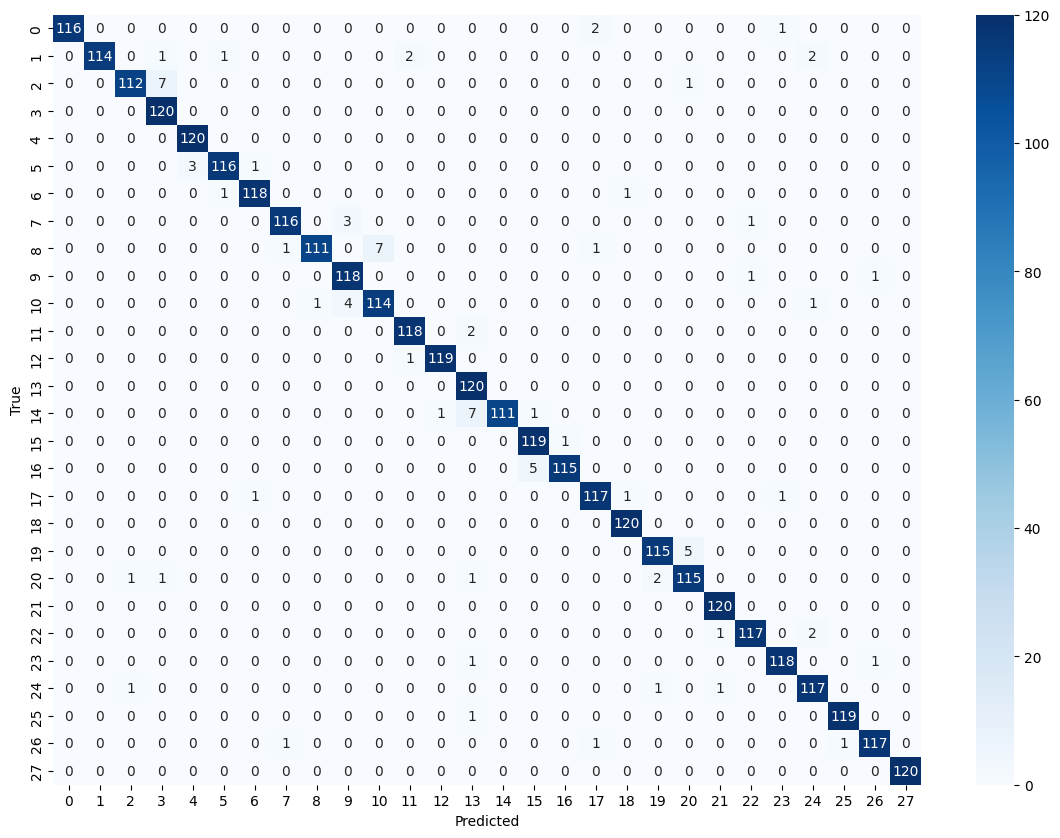

In [ ]:
y_preds = model.predict(x_test)
y_pred_classes = np.argmax(y_preds, axis=1)
y_true = np.argmax(y_test, axis=1)
conf_matrix = confusion_matrix(y_true, y_pred_classes)
# Plot the confusion matrix as a heat map
plt.figure(figsize=(14, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
class_report = classification_report(y_true, y_pred_classes)

print("Classification Report:\n")
print(class_report)

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       119
           1       1.00      0.95      0.97       120
           2       0.98      0.93      0.96       120
           3       0.93      1.00      0.96       120
           4       0.98      1.00      0.99       120
           5       0.98      0.97      0.97       120
           6       0.98      0.98      0.98       120
           7       0.98      0.97      0.97       120
           8       0.99      0.93      0.96       120
           9       0.94      0.98      0.96       120
          10       0.94      0.95      0.95       120
          11       0.98      0.98      0.98       120
          12       0.99      0.99      0.99       120
          13       0.91      1.00      0.95       120
          14       1.00      0.93      0.96       120
          15       0.95      0.99      0.97       120
          16       0.99      0.96      0.97       120
   

In [ ]:
model.save('/content/drive/My Drive/ar_cahr.h5')